In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-14 01:59:19--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-14 01:59:19--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5e76600869d375a8663112608.dl.dropboxusercontent.com/cd/0/get/BwulGEkz-tJwCxpF6RUzzkx9TnAe3T-YXVCrIo15WQoGvHh6D-_UYDtkVQtJeFqQ3x9dml-aB-goKUvgcnYiUAlo959VGrqCpiutDJCD0WYKxouZyk7mqBiLjxCqxd6DX8Ajibk6cix5h7HVSFlBbIwr7xGuxZr5vF4Pz_Ekn7NdwYpQpA4ZdGLBiYWeAefOly8/file?dl=1# [following]
--2022-11-14 01:59:20--  https://ucf5e76600869d375a8663112608.dl.dropboxusercontent.com/cd/0/get/BwulGEkz-tJw

In [3]:
from konlpy.tag import Kkma, Hannanum, Komoran, Twitter, Okt, Mecab

In [4]:
kkma = Kkma()
okt = Okt()
komoran = Komoran()
hannanum = Hannanum()
twitter = Twitter()
mecab = Mecab()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [134]:
import os 
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'swMRG8plbs7LYwkTMHoz'
client_secret = 'jV02Ini3sh'

query = urllib.parse.quote(input("검색 질의: ")) #parse 해주는 이유 사용자 입력값 url로 넣을 수 있는 형태로 변환
idx = 0 
display = 100
start = 1 
end =1000    #네이버 최대 보여줄 수 있는 건 수 1000개

web_df = pd.DataFrame(columns=('Title','Link','Description'))

for start_index in range(start, end, display):


  url = 'https://openapi.naver.com/v1/search/webkr?query=' + query \
    + '&display=' + str(display) + '&start=' + str(start_index)

  request = urllib.request.Request(url)    #요청
  request.add_header('X-Naver-Client-Id', client_id)
  request.add_header('X-Naver-Client-Secret',client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')              # html 태그 특수기호 제거
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      web_df.loc[idx] = [title, link, description]
      idx += 1
  else :
    print("Error Code: " + rescode)

                                                      

   
web_df

검색 질의: 90년대생|청년


,Title,Link,Description
0,사원이 임원 법카 들여다본다…청년 스타트업 그들이 일하는 법 [90년대생 창업자가 ...,https://www.joongang.co.kr/article/25068619,PO 제도를 운영하는 어니스트펀드 서상훈(32) 대표는 &quot;PO 제도는 속도...
1,90년대생의 결혼법 : 칼럼 : 사설.칼럼 : 뉴스 : 한겨레,https://www.hani.co.kr/arti/opinion/column/100...,"엠제트(MZ)세대, 90년대생, 2030청년과 같은 단어가 끊임없이 쏟아져 나온다...."
2,90년대생 여성 노동자 &quot;우리는 일에 진심이다&quot;[플랫] - 경향신문,https://www.khan.co.kr/article/202111191022001,코로나19 이후 청년 여성들의 취업시장 배제가 가속화하는 상황에서 90년대생 여성 ...
3,90년대생이 말하는 '사회적경제 일터' 들어보실래요 &lt; 2030세이가담 &lt...,https://www.eroun.net/news/articleView.html?id...,90년대생 청년들이 사회적경제 현주소를 공론화한다.사회적경제 미디어 이로운넷(대표 ...
4,더불어민주당 90년대생 의원 모임 안산 청년시설 현장 방문 - 팍스경제TV,http://www.paxetv.com/news/articleView.html?id...,"경기도의회 더불어민주당 90년대생 의원 모임(장윤정, 장민수, 정동혁, 유호준, 이..."
...,...,...,...
144,삼성에 호통치는 90년대생…진중권 &quot;이런 국회 오랜만에 본다&quot; |...,https://www.joongang.co.kr/article/23891422,류 의원은 지난 7일 기자회견을 열고 &quot;삼성전자 간부가 언론사 기자출입증을...
145,EDITOR’S LETTER ‘이해진 키즈들’ 90년대생의 진격 - 이코노미조선,http://economychosun.com/client/news/view.php?...,이번 커버 스토리 ‘창업 新주류 90년대생’은 스타트업 생태계의 주류로 떠오르는 9...
146,90년대생이 퇴사하는 이유 | 직장in 생활백서 - 사람인,https://www.saramin.co.kr/zf_user/white-paper/...,젊은 직원들이 1년도 버티지 못하고 나가는 비율이 높은 조직이 있었습니다. 급여나 ...
147,"루한, 90년대생 최초 中 유력 시사잡지 표지 모델 - TV리포트",https://www.tvreport.co.kr/823727,특집호 주인공으로 선정된 이들 가운데 루한은 1990년대생 최초로 인물의 표지 모델...


In [135]:
web = []
for d in web_df.Description :
  web.append(d)

print(web[:5])

['PO 제도를 운영하는 어니스트펀드 서상훈(32) 대표는 &quot;PO 제도는 속도감 있게 일할 수 있는 스타트업 특유의 방식&quot;이라고 말했다. 비대면 진료 플랫폼 닥터나우는 코로나19로 2020년 3월부터 한시 허용된 비대면 진료 기회를 놓치지 않았다. ■ 90년대생 창업자가 온다 by FACTPL 「 팩플팀이 미래 산업(Future of Business)의...', '엠제트(MZ)세대, 90년대생, 2030청년과 같은 단어가 끊임없이 쏟아져 나온다. 그런데 과연 출생연도에 따른 세대 구분과 그에 따른 특성이라는 건 존재하는 걸까. 나는 1990년에 태어났고 새롬은 1992년에 태어났다.... ', '코로나19 이후 청년 여성들의 취업시장 배제가 가속화하는 상황에서 90년대생 여성 노동자의 일을 주제로 광범위한 조사가 이뤄진 것은 처음이다. ▼ “쌍팔년도 노동 환경 힘들다” 여성들의 이직 사유... ', '90년대생 청년들이 사회적경제 현주소를 공론화한다.사회적경제 미디어 이로운넷(대표 윤병훈)은 오는 8월 10일 개최하는 창사 13주년 기념 사회가치 컨퍼런스 ‘2030세이가담’의 첫 순서로 ‘90년대생 사회적경제 토크’를 연다고 밝혔다. 오전 10시 45분부터 11시 55분까지 진행된다.해당 세션에는 ▲노순호 동구밭 대표(1991년생) ▲박유진 이로운...', '경기도의회 더불어민주당 90년대생 의원 모임(장윤정, 장민수, 정동혁, 유호준, 이자형)은 지난 2일 장윤정 의원 주관으로 안산시 최초 청년공간 경기내일스퀘어 상상대로를 방문해 청년들이 이용하며 발생된 문제점과 개선사항 및 주요 추진실적을 보고받았다.이후 복합청년몰 신안코아 청년몰로 이동해 청년상인과 간담회를 통해 필...']


In [136]:
stop_words = ''
stop_words = stop_words.split(' ')
print(stop_words)

['']


In [137]:
tagger = Mecab()
web_nouns =[]
for w in web:
  for noun in tagger.nouns(w):
    if noun not in stop_words:
      web_nouns.append(noun)

web_nouns[:10]

['제도', '운영', '어니스트', '펀드', '서상훈', '대표', '제도', '속도', '일', '수']

In [143]:
# 네이버 블로그 키워드 분석
from pyparsing.helpers import original_text_for
import os 
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'swMRG8plbs7LYwkTMHoz'
client_secret = 'jV02Ini3sh'

query = urllib.parse.quote(input("검색 질의: ")) #parse 해주는 이유 사용자 입력값 url로 넣을 수 있는 형태로 변환
idx = 0 
display = 100
start = 1 
end =1000    #네이버 최대 보여줄 수 있는 건 수 1000개
sort = 'sim'  #유사도순으로 정렬

blog_df = pd.DataFrame(columns=('Title','Link','Description','Blogger Name', 'Blogger Link'))

for start_index in range(start, end, display):


  url = 'https://openapi.naver.com/v1/search/blog?query=' + query \
    + '&display=' + str(display) + '&start=' + str(start_index) + '&sort=' + sort

  request = urllib.request.Request(url)    #요청
  request.add_header('X-Naver-Client-Id', client_id)
  request.add_header('X-Naver-Client-Secret',client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')              # html 태그 특수기호 제거
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      blogger_name = items[item_index]['bloggername']
      blogger_link = items[item_index]['bloggerlink']
      blog_df.loc[idx] = [title, link, description , blogger_name,blogger_link]
      idx += 1
  else :
    print("Error Code: " + rescode)

                                                      

   
blog_df

검색 질의: 인천여행|90년대생|청년


,Title,Link,Description,Blogger Name,Blogger Link
0,인천지역90년대생 여성노동자 실태조사 토론회,https://blog.naver.com/icwwa/222801079093,"'차별에 균열을, 노동에 성평등을' 인천지역 90년대생 토론회가 7월21일(목요일)...",인천여성노동자회,blog.naver.com/icwwa
1,(00後)&gt; &apos;90년대생과도 달라&apos; 현실적이고 합리적인 애국...,https://blog.naver.com/china_lab/222782734450,"21세기가 도래하자 1980년대생인 바링허우(80後), 90년대생인 주링허우(90後...",CHINA LAB,blog.naver.com/china_lab
2,90년대생 그들의 꿈을 이야기하다.,https://blog.naver.com/codi1215/222798251609,그런 세상에서는 다양한 생각을 하는 청년이 좀 더 많아졌으면 좋겠습니다.그리고 그 ...,(주)삼일리얼티/ 리즈의 닥터부동산TV,blog.naver.com/codi1215
3,무조건 짠테크? 90년대생에게 맞는 재테크는 따로 있다!,https://blog.naver.com/daishin_blog/221607529364,"자기계발, 여행 비용 등이 포함됩니다. 꾸밈비는 말 그대로 의류, 미용 등 나를 꾸...",대신증권 공식 블로그,blog.naver.com/daishin_blog
4,문경 양파밭 폐가에 8만명 몰렸다…90년대생 5인의 기적,https://blog.naver.com/ddanggut/222916348997,20년간 방치되던 고택을 90년대생 다섯이 되살렸다. ［사진 리플레이스］ 경북 문경...,천방지축 건축가,blog.naver.com/ddanggut
...,...,...,...,...,...
995,"1990년대, 우리가 열광한 책들",https://blog.naver.com/lsb8666/10181730434,5년간 장학금을 놓치지 않았다는 '수재' 의대생이 바쁜 시간을 쪼개 &lt;마지막 ...,JISIKS.com,blog.naver.com/lsb8666
996,오늘 의 역사 2월 7일-8일-9일,https://blog.naver.com/21mole/221799546393,"일본군 인천 상륙 /제물포 전쟁 1904 년 일본군, 서울에 진주 1902 년 정치...",21mole님의 블로그,blog.naver.com/21mole
997,이완용과 백정증권(白井證券),https://blog.naver.com/hanadtsec/10187194456,일본 순사들의 삼엄한 경비를 뚫고 젊은 청년 한 명이 인력거를 향해 득달같이 달려들...,하나증권 공식 블로그,blog.naver.com/hanadtsec
998,"名將열전-맥아더,몽고메리.패튼.아이젠하워.브래들리,마샬....",https://blog.naver.com/bschun55/60025089145,스워츠코프 장군은 청년시절 아버지가 전후 이란 샤왕 군사고문으로 있을 때 중동을 처...,나의 침실이 復活의 洞 窟 임을 네야 알련만.....,blog.naver.com/bschun55


In [144]:
blog = []
for b in blog_df.Description:
  blog.append(b)


print(blog[:5])

["'차별에 균열을, 노동에 성평등을' 인천지역 90년대생 토론회가 7월21일(목요일) 온/오프로 진행됩니다. 작년에 여성노동자회에서 전국을 대상으로 조사한 자료에서 인천지역 청년노동자들의 사례를... ", '21세기가 도래하자 1980년대생인 바링허우(80後), 90년대생인 주링허우(90後)가 사회 전면에 등장하기... 해외여행을 수시로 다니며 명품을 거리낌 없이 소비했다. 이제 2000년대 출생자 링링허우(00後)가 새로운... ', '그런 세상에서는 다양한 생각을 하는 청년이 좀 더 많아졌으면 좋겠습니다.그리고 그 다양한 선택들을 응원하고 지지해주는 어른들이 많아졌으면 좋겠습니다. https://youtu.be/CVp_iDr404c #90년대생의꿈... ', '자기계발, 여행 비용 등이 포함됩니다. 꾸밈비는 말 그대로 의류, 미용 등 나를 꾸미기 위해 드는... (사진 출처: 청년정책 블로그) 지금까지 대신증권과 함께 90년대생을 위한 돈 관리 노하우에 대해... ', '20년간 방치되던 고택을 90년대생 다섯이 되살렸다. ［사진 리플레이스］ 경북 문경시는 29년 뒤 사라질... 1막-고자재로 해체될 뻔한 200년 된 한옥 한옥은 인천 채씨의 집성촌이던 동네 입구에 있다. 1790년에... ']


In [214]:
stop_words = '기자 나라 지역 작가 문 가능 경기 일본 시절 간 대표 뉴스 하우스 공정 최근 위 당시 대학 기업 도 점 하나 지원 부산 문제 학교 여성 돈 책 집 때문 편 앞장 처음 이유 속 이 제 데 이후 시작 경제 차 이야기 창업 생각 시대 해외 인천광역시 대생 청년 세대 대 중국 그 사람 사회 말 한국 미국 서울 해외여행 겨울 유럽 세 성인 싱 금 파리 프로 듀 한국인 최초 항해사 환경 지구 랩 프로 듀 그린피스 인천 이곳 청소년 공간 다누 이달 휴먼 여름 방학 회관 엄선 개 코로나 북 길 호 티 웨이 후 운항 말씀 스케줄 후 여행 일 월 시간 공항 도착 나 년 때 수 시 날 만 분 비행기 것 정 거 전 번 이번 우리 박 곳 내 중 정도 리 이상 자리 거리 위치 유명 서쪽 소개 주 원 층 등 끝 게 명 저'
stop_words = stop_words.split(' ')
print(stop_words)

['기자', '나라', '지역', '작가', '문', '가능', '경기', '일본', '시절', '간', '대표', '뉴스', '하우스', '공정', '최근', '위', '당시', '대학', '기업', '도', '점', '하나', '지원', '부산', '문제', '학교', '여성', '돈', '책', '집', '때문', '편', '앞장', '처음', '이유', '속', '이', '제', '데', '이후', '시작', '경제', '차', '이야기', '창업', '생각', '시대', '해외', '인천광역시', '대생', '청년', '세대', '대', '중국', '그', '사람', '사회', '말', '한국', '미국', '서울', '해외여행', '겨울', '유럽', '세', '성인', '싱', '금', '파리', '프로', '듀', '한국인', '최초', '항해사', '환경', '지구', '랩', '프로', '듀', '그린피스', '인천', '이곳', '청소년', '공간', '다누', '이달', '휴먼', '여름', '방학', '회관', '엄선', '개', '코로나', '북', '길', '호', '티', '웨이', '후', '운항', '말씀', '스케줄', '후', '여행', '일', '월', '시간', '공항', '도착', '나', '년', '때', '수', '시', '날', '만', '분', '비행기', '것', '정', '거', '전', '번', '이번', '우리', '박', '곳', '내', '중', '정도', '리', '이상', '자리', '거리', '위치', '유명', '서쪽', '소개', '주', '원', '층', '등', '끝', '게', '명', '저']


In [215]:
tagger = Mecab()
blog_nouns = []
for b in blog:
  for noun in tagger.nouns(b):
    if noun not in stop_words:
      blog_nouns.append(noun)

blog_nouns[:10]

['차별', '균열', '노동', '성', '평등', '토론회', '목요일', '오프', '진행', '작년']

In [216]:
from collections import Counter
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
top_blog_nouns

{'추억': 64,
 '카페': 61,
 '사진': 48,
 '문화': 41,
 '친구': 32,
 '시장': 31,
 '경험': 28,
 '도시': 28,
 '세계': 27,
 '영화': 27,
 '노래': 26,
 '오늘': 25,
 '가족': 24,
 '삶': 24,
 '맛집': 23,
 '호텔': 22,
 '추천': 21,
 '기억': 21,
 '사랑': 21,
 '교육': 21,
 '취업': 21,
 '여기': 21,
 '마음': 21,
 '성장': 21,
 '작년': 20,
 '저자': 20,
 '회사': 20,
 '생활': 20,
 '센터': 20,
 '이해': 20,
 '세상': 19,
 '듯': 19,
 '감성': 19,
 '허우': 18,
 '나이': 18,
 '앞': 18,
 '단체': 18,
 '눈': 18,
 '아침': 18,
 '인': 18,
 '러브': 18,
 '장': 18,
 '차이': 18,
 '글': 18,
 '부': 18,
 '관련': 18,
 '대구': 18,
 '대한민국': 18,
 '자신': 18,
 '밀레': 18,
 '니얼': 18,
 '조선': 18,
 '지금': 17,
 '국제공항': 17,
 '요즘': 17,
 '직장': 17,
 '자유': 17,
 '경기도': 17,
 '성공': 17,
 '특징': 17,
 '기성': 17,
 '사업': 17,
 '달': 17,
 '살': 17,
 '어디': 17,
 '꿈': 16,
 '출처': 16,
 '사태': 16,
 '적': 16,
 '중심': 16,
 '아이': 16,
 '역사': 16,
 '국민': 16,
 '차이나타운': 16,
 '엄마': 16,
 '최소': 16,
 '결혼': 16,
 '신혼': 16,
 '공감': 16,
 '최고': 16,
 '마지막': 16,
 '베트남': 16,
 '조사': 15,
 '자기': 15,
 '정책': 15,
 '씨': 15,
 '동네': 15,
 '천': 15,
 '부모': 15,
 '운영': 15,
 '출발': 15,
 '미

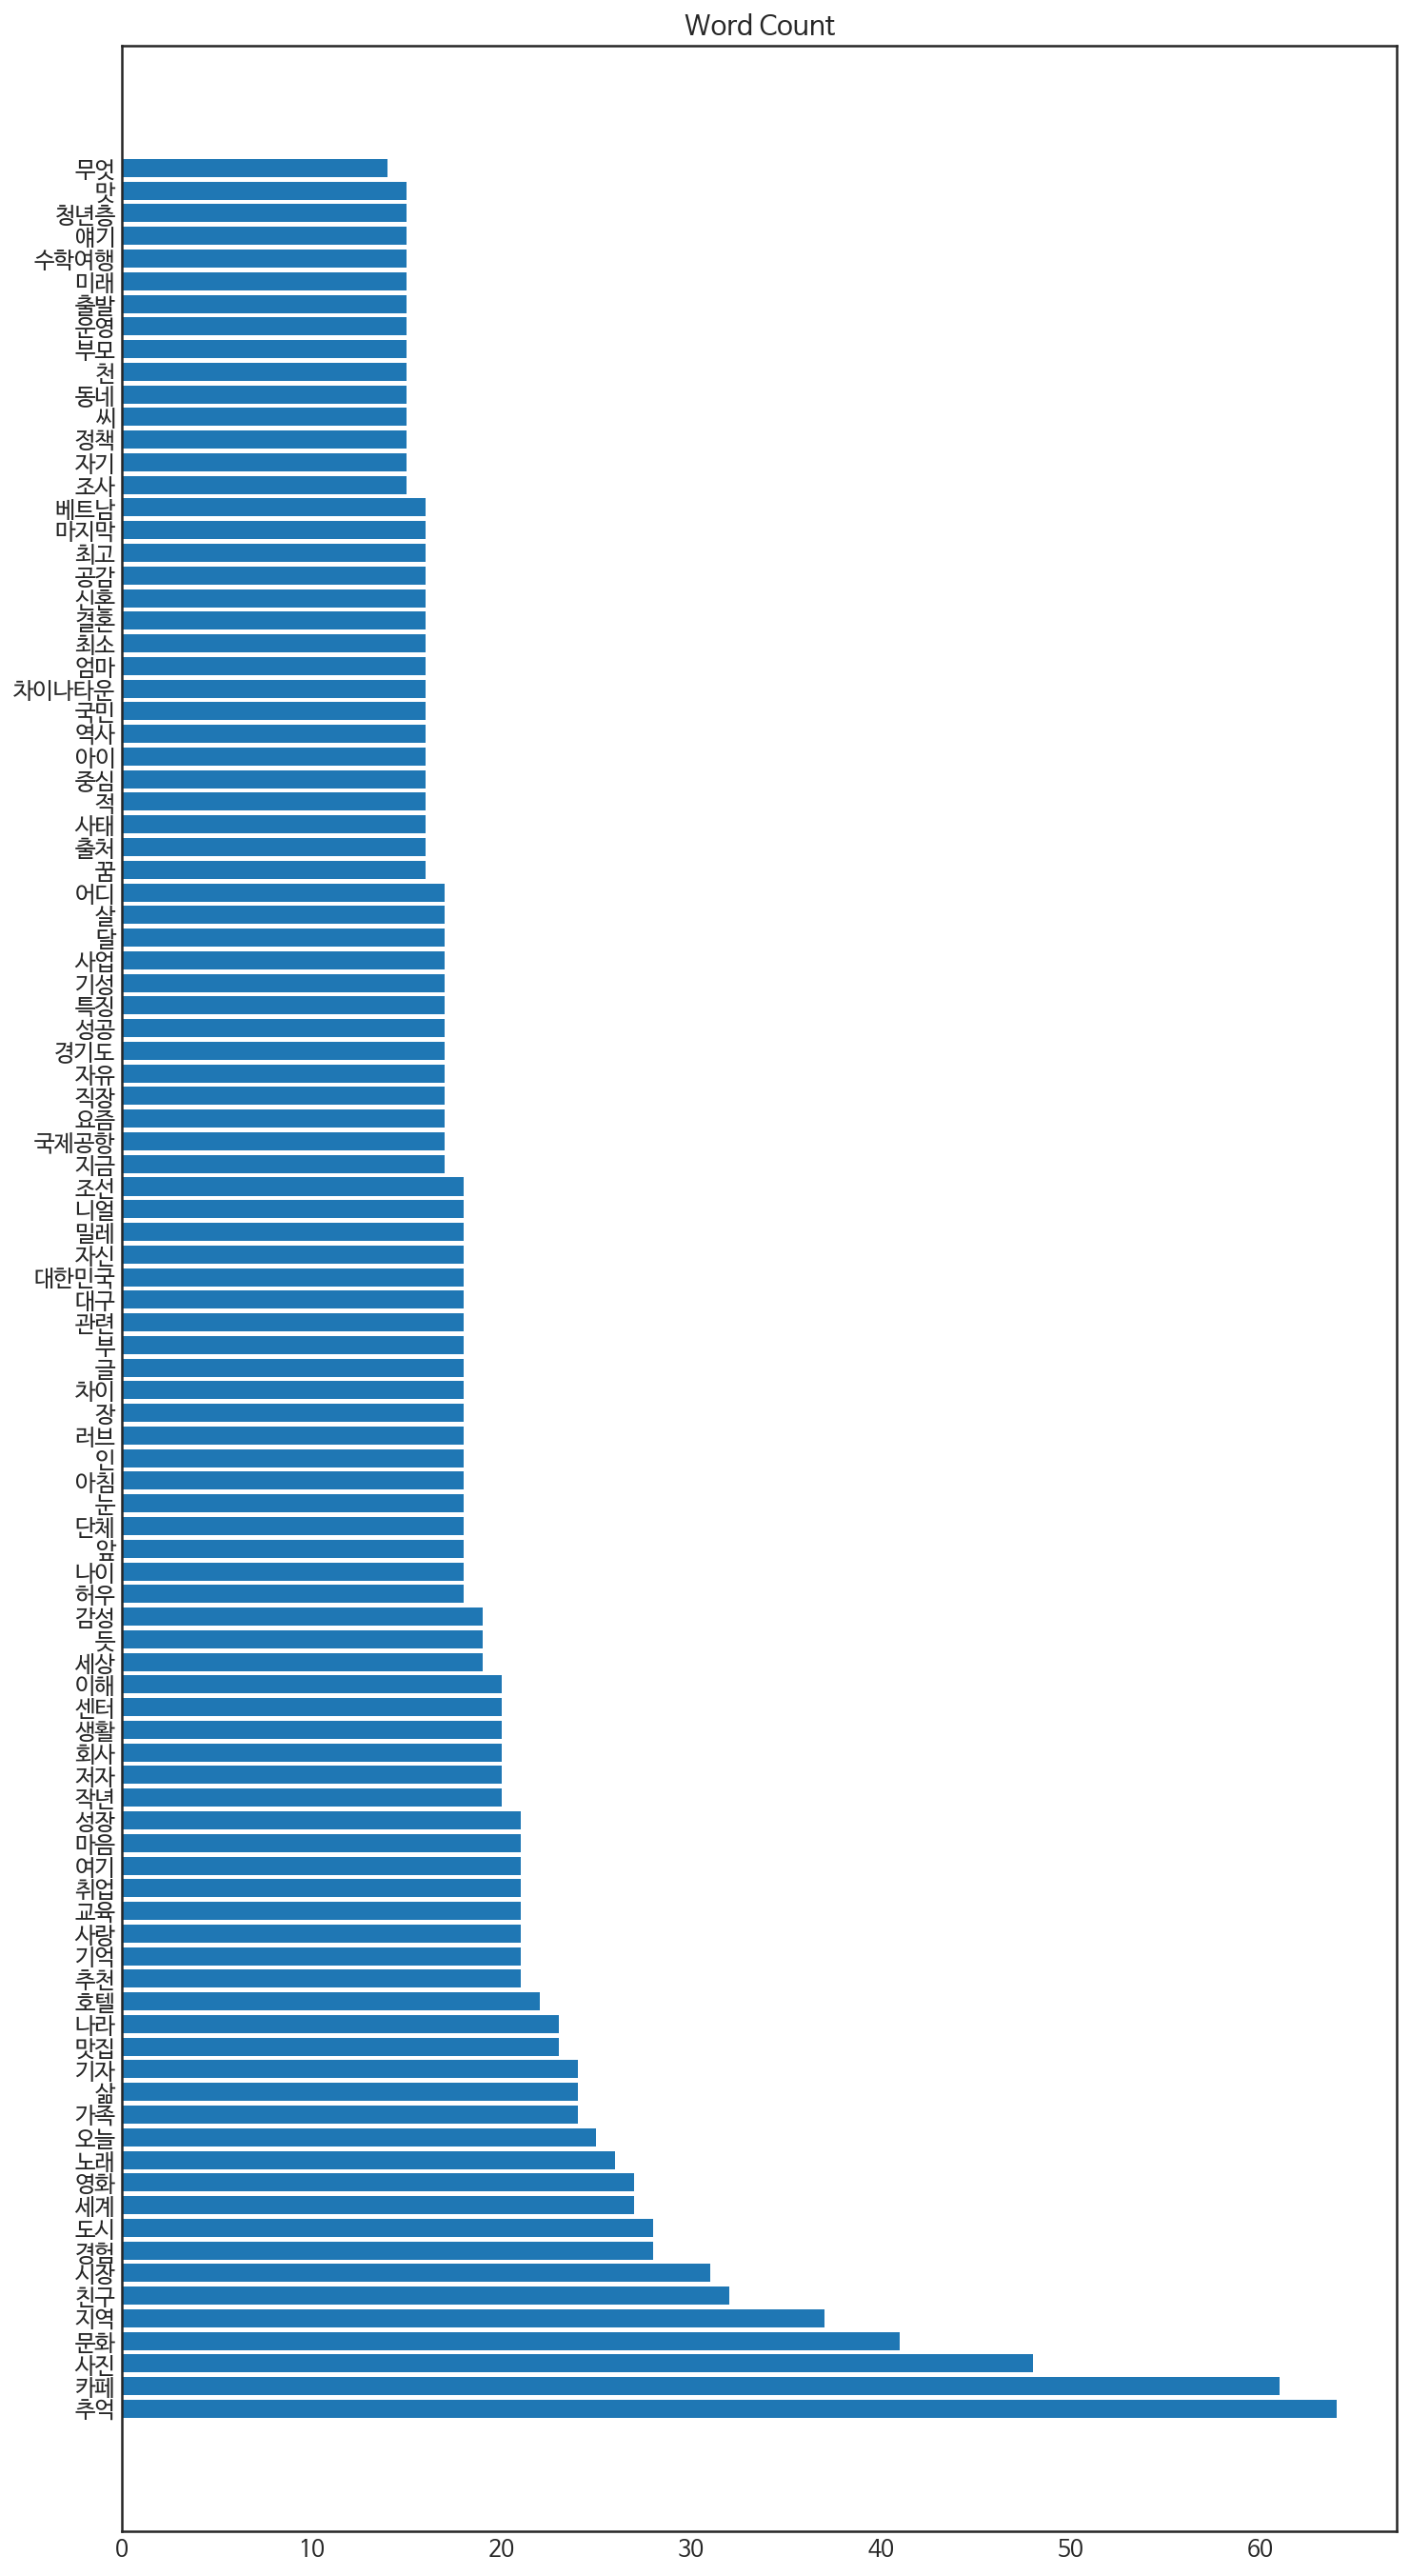

In [210]:
#단어 빈도 시각화
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos,top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos,top_blog_nouns.keys())
plt.show()

In [198]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


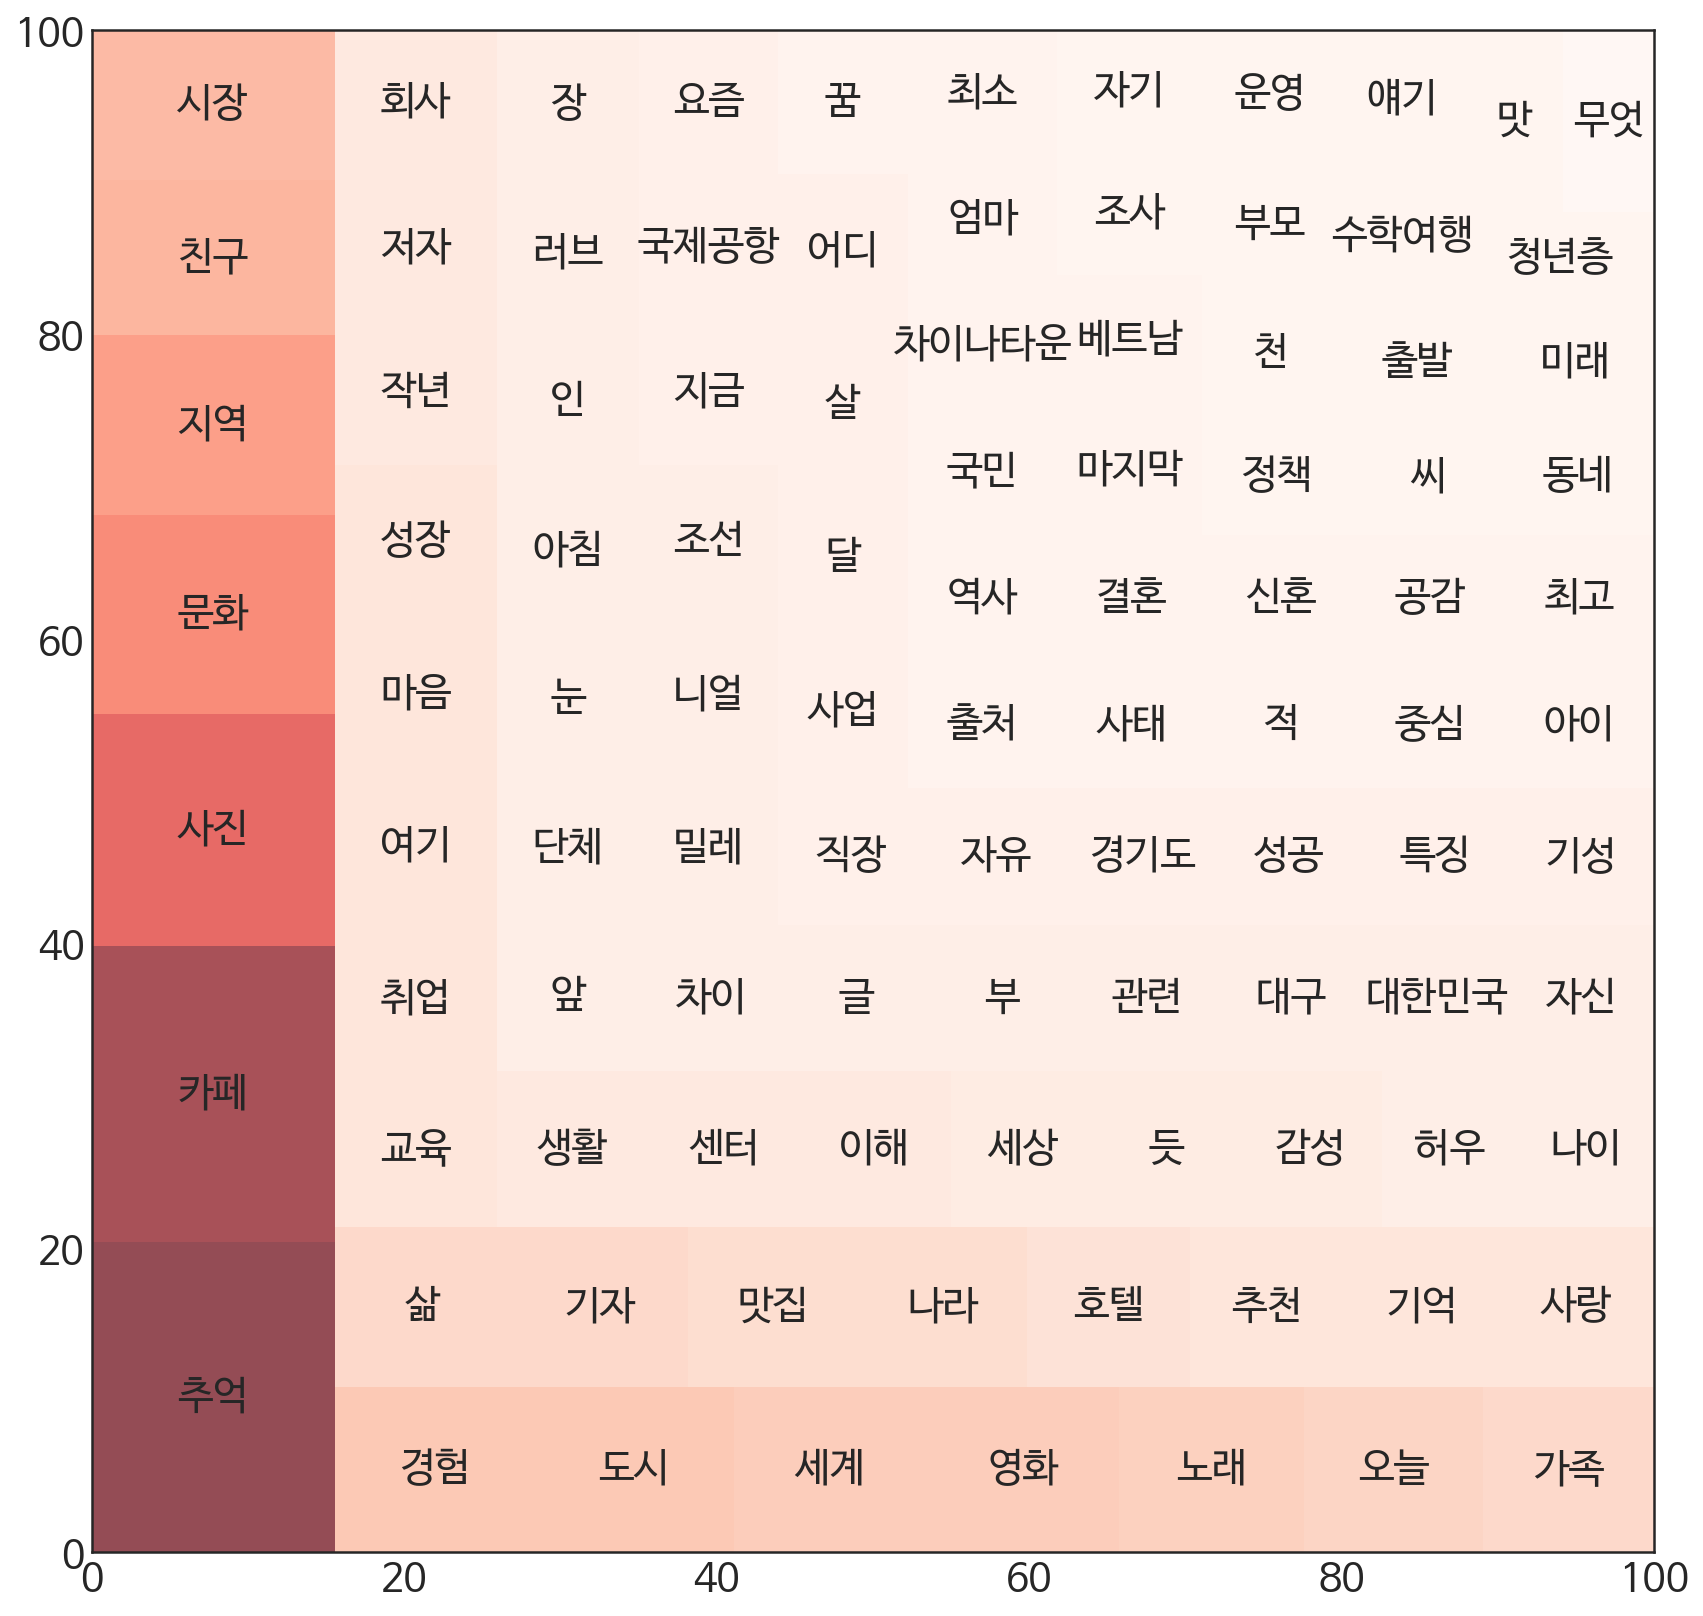

In [211]:

import squarify
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin = min(top_blog_nouns.values()), 
                            vmax = max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label = top_blog_nouns.keys(),
              sizes= top_blog_nouns.values(),
              color = colors,
              alpha =.7);


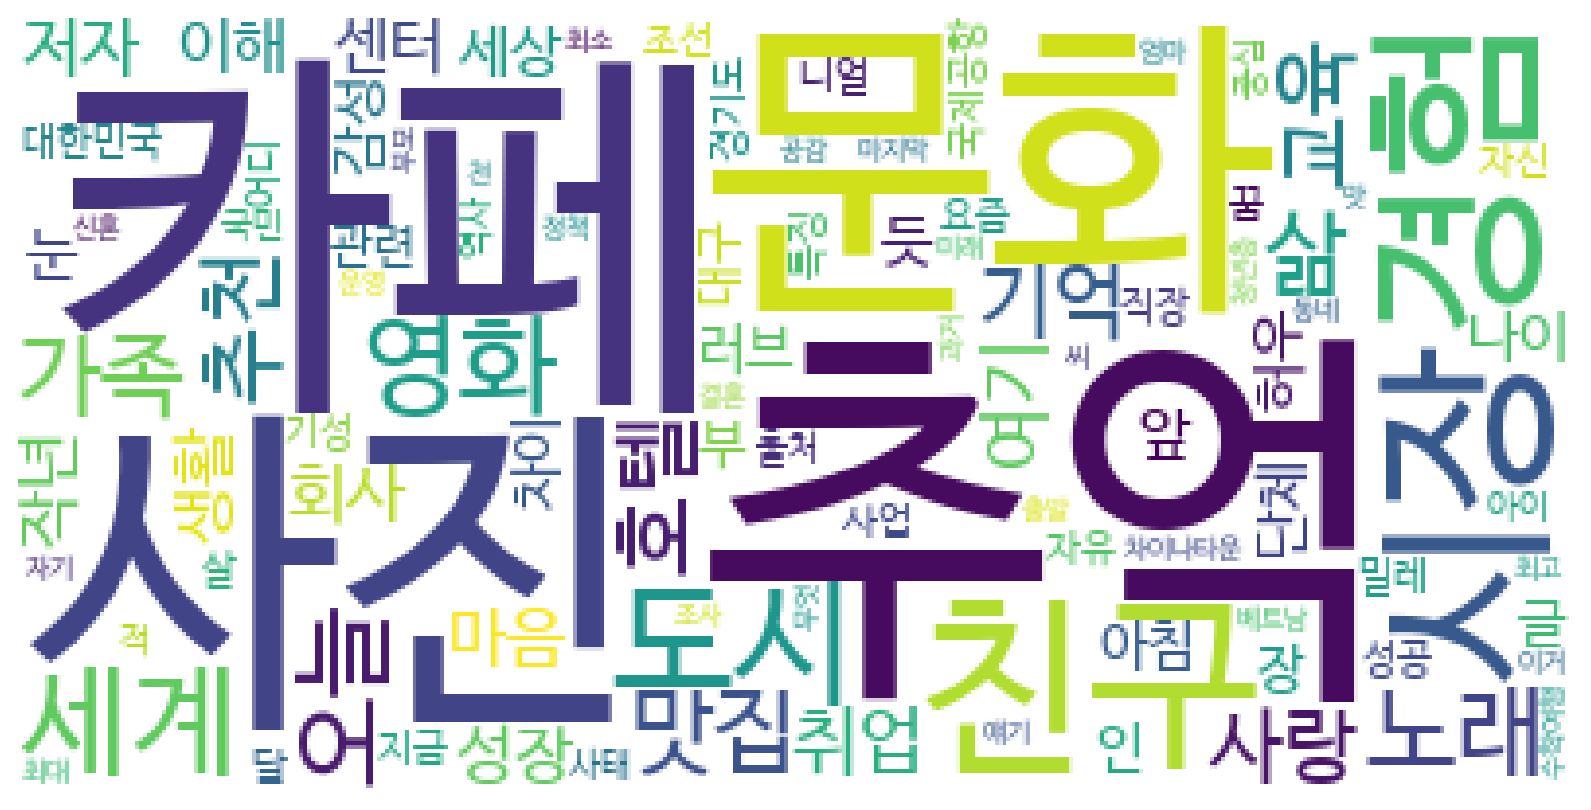

In [217]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', font_path = './font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14,14))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()


In [90]:
blog_df.to_csv("blog_dataframe.csv",encoding='utf-8-sig',index = False)